<a href="https://colab.research.google.com/github/danielabebe1/Capstone2/blob/master/Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom
import os
from os import listdir
import pandas as pd
import numpy as np
import glob
import tqdm
from typing import Dict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#pydicom
import pydicom
import warnings
warnings.filterwarnings('ignore')
plt.show()

!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

     |████████████████████████████████| 35.5MB 1.3MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 71kB 2.0MB/s 


## Uploading datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Directories
!pip install colorama
image_train='/content/drive/My Drive/OSIC Pulmonary Fibrosis/train'
fimage_test='/content/drive/My Drive/OSIC Pulmonary Fibrosis/test'
train_csv='/content/drive/My Drive/OSIC Pulmonary Fibrosis/train.csv'
test_csv='/content/drive/My Drive/OSIC Pulmonary Fibrosis/test.csv'
#read csv
df_train=pd.read_csv(train_csv)
df_test=pd.read_csv(test_csv)

In [4]:
df_train.head()

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [5]:
df_train.shape

(1549, 7)

In [6]:
df_train.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

## **Exploratory data analysis(EDA)**


In [7]:
#From the statistic summary, there are 176 unique patiets
df_train.describe(include='all')

Patient        Weeks  ...   Sex  SmokingStatus
count                        1549  1549.000000  ...  1549           1549
unique                        176          NaN  ...     2              3
top     ID00421637202311550012437          NaN  ...  Male      Ex-smoker
freq                           10          NaN  ...  1224           1038
mean                          NaN    31.861846  ...   NaN            NaN
std                           NaN    23.247550  ...   NaN            NaN
min                           NaN    -5.000000  ...   NaN            NaN
25%                           NaN    12.000000  ...   NaN            NaN
50%                           NaN    28.000000  ...   NaN            NaN
75%                           NaN    47.000000  ...   NaN            NaN
max                           NaN   133.000000  ...   NaN            NaN

[11 rows x 7 columns]

In [8]:
print("Lowest number of record : ",df_train["Patient"].value_counts().sort_values(ascending=True).head(1))
print("Highest number of records: ",df_train["Patient"].value_counts().sort_values(ascending=True).tail(1))

Lowest number of record :  ID00047637202184938901501    6
Name: Patient, dtype: int64
Highest number of records:  ID00421637202311550012437    10
Name: Patient, dtype: int64


Looking at the statistics of train data, there are 176 patients which means that each patient has approximatly 9 records. The maximum number of record is 10 and minimum number is 6.

The age distributed between 49 and 88 with mean 67. Looking at the distribution plot below, uniform with a little swewness to the left.

Text(0.5, 1.0, 'Age Distribution')

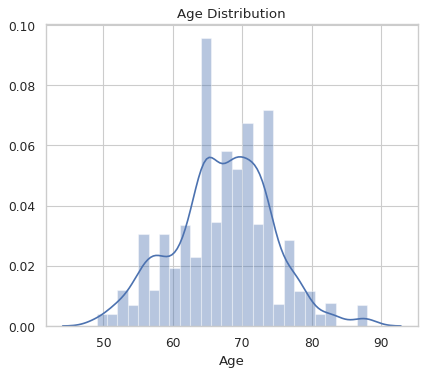

In [9]:
plt.figure(figsize=(6,5), dpi= 80)
sns.distplot(df_train['Age'])
plt.title('Age Distribution')

In [10]:
df_train.columns
#take detail of unique patients: Patient, Age, Sex and SmokingStatus. Other attributes such as 'Weeks', 'FVC', 'Percent',
#are measurement
cols=['Patient','Age','Sex','SmokingStatus']
unique_patient = df_train[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
unique_patient.head()

Patient  Age   Sex SmokingStatus
0   ID00007637202177411956430   79  Male     Ex-smoker
9   ID00009637202177434476278   69  Male     Ex-smoker
18  ID00010637202177584971671   60  Male     Ex-smoker
27  ID00011637202177653955184   72  Male     Ex-smoker
36  ID00012637202177665765362   65  Male  Never smoked

- 79% of the patients are male and 21% female. 
- the majority of patients are ex-smokers with 67% and patients who never smoke are 28%, current smokers are only 5%
- Ex-smokers 90% are male and 10% are female
- Never smoked 53% male and 47% female
- Current skokers 78% male and 22% female


In [11]:
print("Number of Male: ",df_train[df_train["Sex"]=="Male"].shape[0]*100/len(df_train))
print("Number of Female: ",df_train[df_train["Sex"]=="Female"].shape[0]*100/len(df_train))

Number of Male:  79.0187217559716
Number of Female:  20.981278244028406


In [12]:
print("Number of Ex-smoker: ",df_train[df_train["SmokingStatus"]=="Ex-smoker"].shape[0]*100/len(df_train))
print("Number of Never a smoker: ",df_train[df_train["SmokingStatus"]=="Never smoked"].shape[0]*100/len(df_train))
print("Number of Currently smokes: ",df_train[df_train['SmokingStatus']=="Currently smokes"].shape[0]*100/len(df_train))

Number of Ex-smoker:  67.01097482246611
Number of Never a smoker:  27.695287282117494
Number of Currently smokes:  5.293737895416398


In [13]:
df_train[df_train['SmokingStatus']=='Ex-smoker']['Sex'].value_counts()*100/len(df_train[df_train['SmokingStatus']=='Ex-smoker'])

Male      89.691715
Female    10.308285
Name: Sex, dtype: float64

In [14]:
df_train[df_train['SmokingStatus']=='Never smoked']['Sex'].value_counts()*100/len(df_train[df_train['SmokingStatus']=='Never smoked'])

Male      53.379953
Female    46.620047
Name: Sex, dtype: float64

In [15]:
df_train[df_train['SmokingStatus']=='Currently smokes']['Sex'].value_counts()*100/len(df_train[df_train['SmokingStatus']=='Currently smokes'])

Male      78.04878
Female    21.95122
Name: Sex, dtype: float64

In [16]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

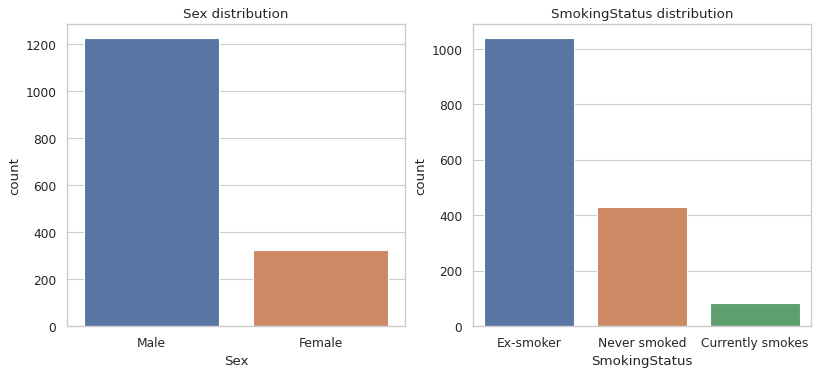

In [17]:
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1, 2, 1)
#Extracting female users and plotting the frequency
sns.countplot('Sex', data=df_train)
plt.title('Sex distribution')
#Extracting male users and plotting the frequency
plt.subplot(1, 2, 2)
sns.countplot('SmokingStatus', data=df_train)
plt.title('SmokingStatus distribution')

plt.show()

Forced vital capacity (FVC) is the recorded lung capacity in ml which is defined as the amount of air that can be forcibly exhaled from your lungs after taking the deepest breath possible, as measured by spirometry.




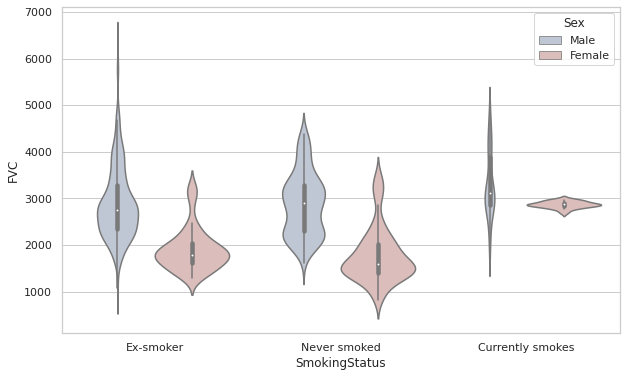

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x="SmokingStatus",y="FVC",data=df_train, palette="vlag", hue='Sex')


The persentange in the dataset is an approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics. Hence it is possible to calculate the FVC of the corresponding normal person.

FVC_normal=FVC_measured*100/Percent

In [19]:
df_train['FVC_Normal']=df_train['FVC']*100/df_train['Percent']
df_train.sample(5)

Patient  Weeks   FVC  ...     Sex  SmokingStatus FVC_Normal
150   ID00038637202182690843176     63  3896  ...    Male      Ex-smoker     4066.8
1217  ID00337637202286839091062     44  3904  ...    Male      Ex-smoker     4118.8
1048  ID00288637202279148973731     22  2122  ...  Female      Ex-smoker     2888.4
281   ID00078637202199415319443      7  1823  ...  Female      Ex-smoker     2723.7
1108  ID00305637202281772703145     10  2938  ...    Male      Ex-smoker     3782.4

[5 rows x 8 columns]

In [20]:
df_train['FVC_diff']=df_train['FVC_Normal']-df_train['FVC']

In [21]:
df_train['FVC_Changing_Rate']=(df_train['FVC_Normal']-df_train['FVC'])*100/df_train['FVC_Normal']

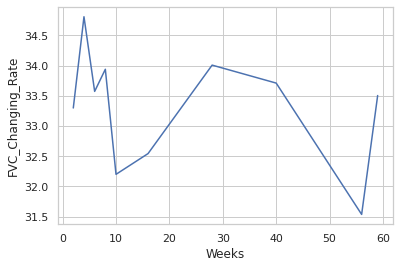

In [22]:
sns.lineplot(x='Weeks', y='FVC_Changing_Rate', data= df_train[df_train['Patient']=='ID00119637202215426335765'])

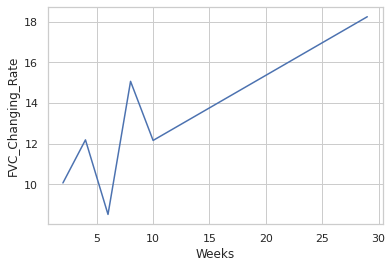

In [23]:
sns.lineplot(x='Weeks', y='FVC_Changing_Rate', data= df_train[df_train['Patient']=='ID00047637202184938901501']) 

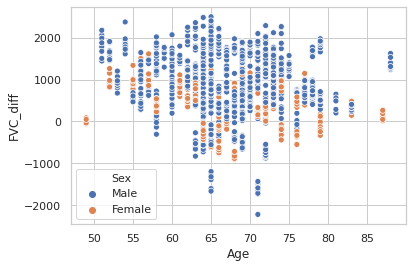

In [24]:
sns.scatterplot(x='Age', y='FVC_diff', data=df_train, hue='Sex')

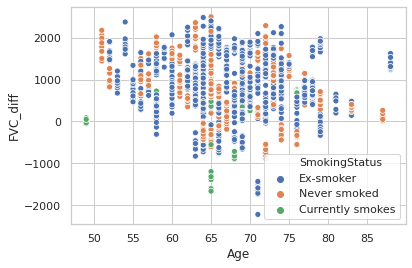

In [25]:
sns.scatterplot(x='Age', y='FVC_diff', data=df_train, hue='SmokingStatus')

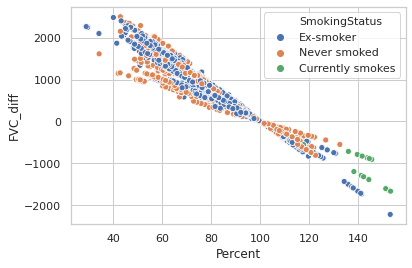

In [26]:
sns.scatterplot(x='Percent', y='FVC_diff', data=df_train, hue='SmokingStatus')

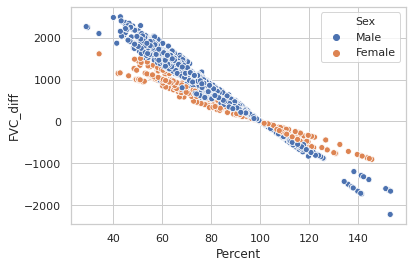

In [27]:
sns.scatterplot(x='Percent', y='FVC_diff', data=df_train, hue='Sex')

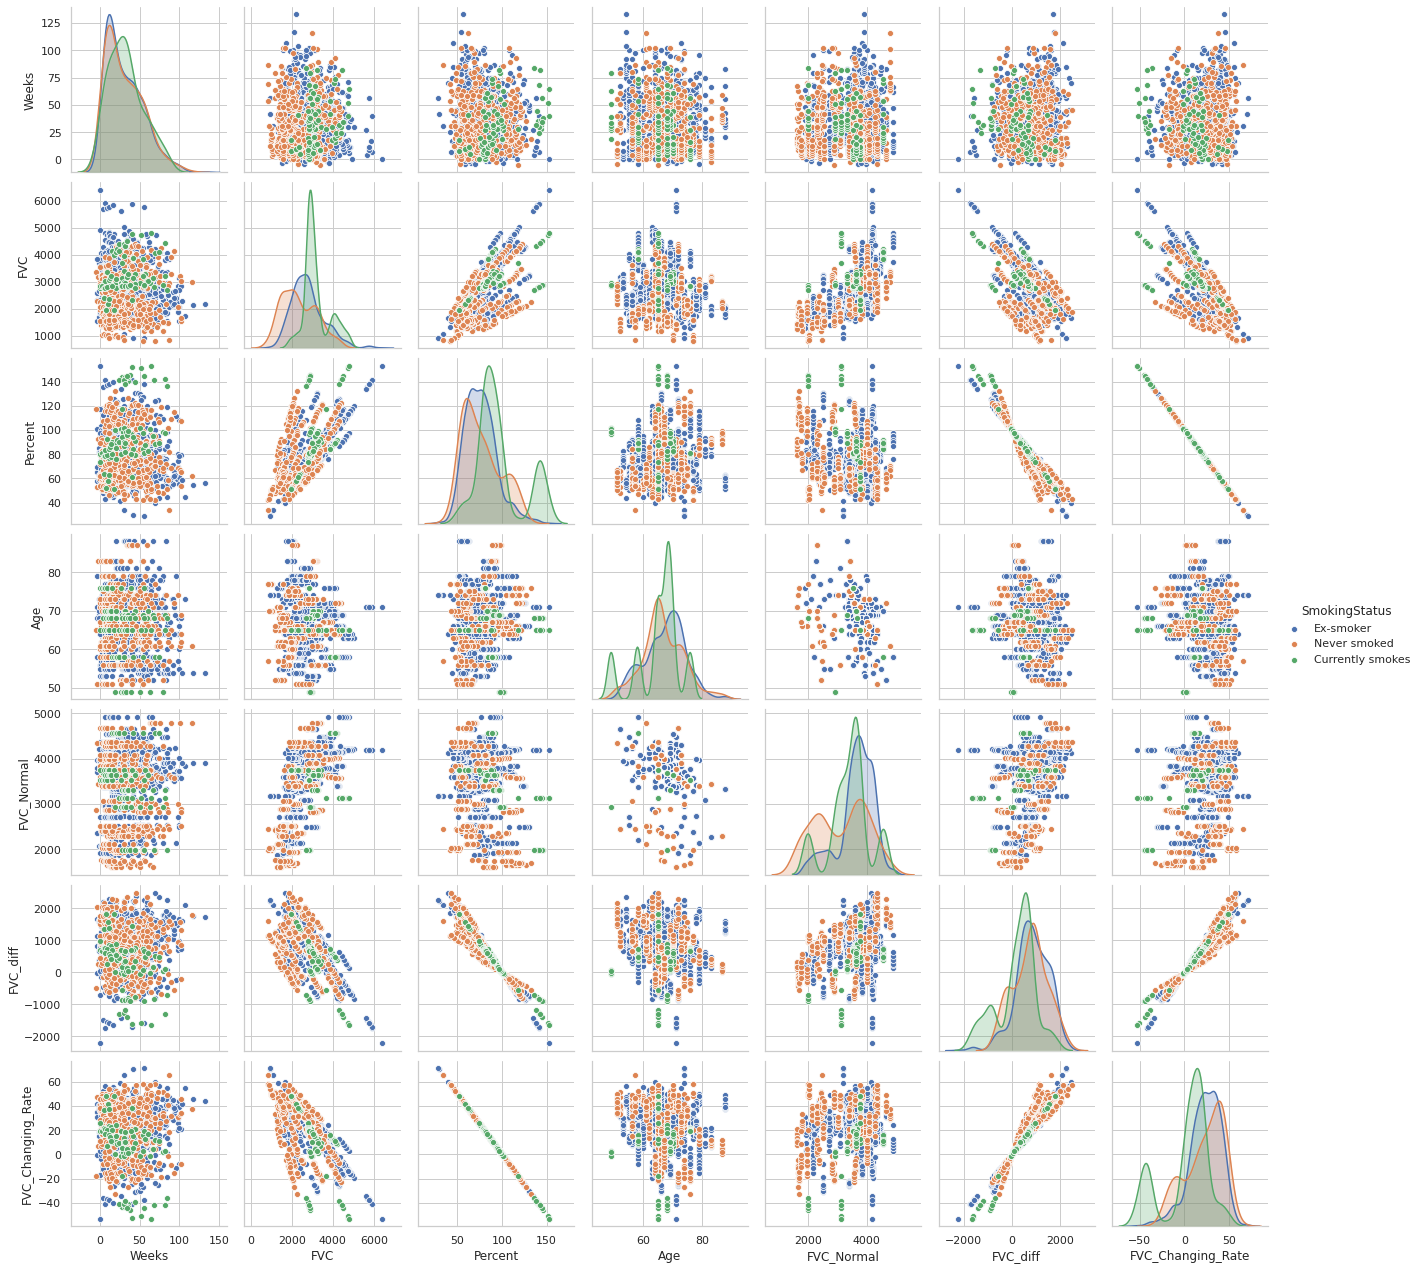

In [28]:
sns.pairplot(df_train, hue='SmokingStatus')

## Loading Images
The images are in DICOM format. DICOM stands for Digital Imaging and Communications in Medicine. Wikipidea defines DICOM as: it is the standard for the communication and management of medical imaging information and related data. DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, and picture archiving and communication systems (PACS) from multiple manufacturers.

In [30]:
!pip install fastai2 -q
!pip install pydicom kornia opencv-python scikit-image
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.medical.imaging import *

In [31]:
#image_train='/content/drive/My Drive/OSIC Pulmonary Fibrosis/train'
train_images = get_dicom_files(image_train)
train_images

(#33035) [Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/102.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/100.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/101.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/103.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/107.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/10.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/105.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/106.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/1.dcm'),Path('/content/drive/My Drive/OSIC Pulmonary Fibrosis/train/ID00423637202312137826377/104.dcm')...]

In [32]:
#Now lets take a look the header section of the dicom image
info_view = train_images[0]
dimg = dcmread(info_view)
dimg

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.62289927868364411245944050956437906753
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0018) SOP Instance UID                    UI: 2.25.62289927868364411245944050956437906753
(0008, 0060) Modality                            CS: 'CT'
(000